Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from autoemcee import ReactiveAffineInvariantSampler

sampler = ReactiveAffineInvariantSampler(paramnames, loglike, transform)

results = sampler.run()

sampler.print_results()

[autoemcee] finding starting points and running initial 100 MCMC steps


100%|██████████| 100/100 [00:00<00:00, 840.75it/s]


[autoemcee] rhat chain diagnostic: [1.08197523 1.09111689] (<1.010 is good)
[autoemcee] not converged yet at iteration 1 after 80400 evals
[autoemcee] Running 1000 MCMC steps ...
[autoemcee] Starting points chosen: {83}, L=-32.8
[autoemcee] Starting at [0.54827713 0.55143729] +- [4.31449488e-06 4.59671758e-06]


100%|██████████| 1000/1000 [00:01<00:00, 830.73it/s]

[autoemcee] Starting points chosen: {92}, L=-32.8
[autoemcee] Starting at [0.5503052  0.54975206] +- [4.78590847e-06 4.87496661e-06]



100%|██████████| 1000/1000 [00:01<00:00, 848.18it/s]

[autoemcee] Starting points chosen: {87}, L=-32.8
[autoemcee] Starting at [0.5517947  0.54986288] +- [5.18789023e-06 5.62474579e-06]



100%|██████████| 1000/1000 [00:01<00:00, 847.88it/s]

[autoemcee] Starting points chosen: {95}, L=-32.8
[autoemcee] Starting at [0.55019943 0.5495126 ] +- [4.52229076e-06 5.08853735e-06]



100%|██████████| 1000/1000 [00:01<00:00, 770.95it/s]

[autoemcee] Used 440800 calls in last MCMC run


[autoemcee] rhat chain diagnostic: [1.00026866 1.00017957] (<1.010 is good)
[autoemcee] converged!!!

    Hinz                0.500 +- 0.010
    Kunz                0.500 +- 0.010


The chains converged and we got parameter and uncertainty estimates.

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 521200 times.


Visualisation
--------------------

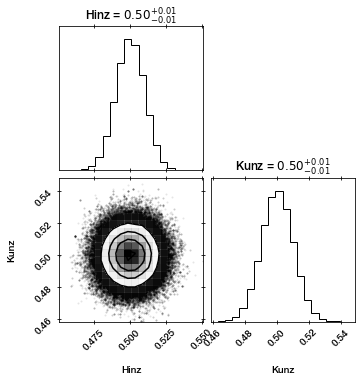

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

import logging
logging.getLogger('autoemcee').setLevel(logging.DEBUG)

sampler = ReactiveAffineInvariantSampler(paramnames, loglike_rosen, transform=transform_rosen)
result = sampler.run(max_ncalls=1000000)


[autoemcee] finding starting points and running initial 100 MCMC steps


100%|██████████| 100/100 [00:00<00:00, 623.38it/s]

[autoemcee] rhat chain diagnostic: [1.02016236 1.01082186] (<1.010 is good)
[autoemcee] not converged yet at iteration 1 after 80400 evals
[autoemcee] Running 1000 MCMC steps ...
[autoemcee] Starting points chosen: {84}, L=-0.0
[autoemcee] Starting at [0.49732951 0.49864447] +- [0.0003298 0.0005775]



100%|██████████| 1000/1000 [00:01<00:00, 627.67it/s]

[autoemcee] Starting points chosen: {13}, L=-0.0
[autoemcee] Starting at [0.59658084 0.69056221] +- [0.00034056 0.00054237]



100%|██████████| 1000/1000 [00:01<00:00, 641.76it/s]

[autoemcee] Starting points chosen: {81}, L=-0.0
[autoemcee] Starting at [0.45616206 0.54018849] +- [0.00033495 0.00057437]



100%|██████████| 1000/1000 [00:01<00:00, 633.62it/s]

[autoemcee] Starting points chosen: {70}, L=-0.0
[autoemcee] Starting at [0.50447467 0.49863139] +- [0.00026029 0.00050001]



100%|██████████| 1000/1000 [00:01<00:00, 635.85it/s]

[autoemcee] Used 440800 calls in last MCMC run


[autoemcee] rhat chain diagnostic: [1.05343804 1.04422692] (<1.010 is good)
[autoemcee] not converged yet at iteration 2 after 521200 evals
[autoemcee] would need more likelihood calls (4408000) than maximum (1000000) for next step


This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % result['ncall'])

Loglikelihood was called 521200 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=result['samples'],
                       names=result['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3))

mcsamples = [samples_g]


Removed no burn in


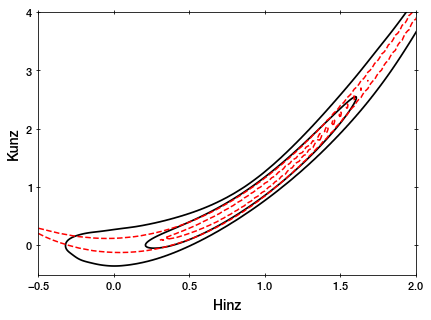

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-5, -1, 0], colors='red')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the MCMC sampler (black) is approximating the rosenbrock curvature (red).

Removed no burn in


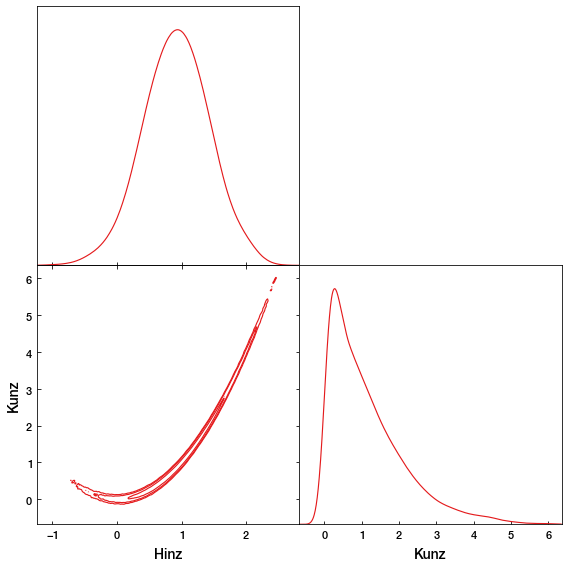

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=result['samples'],
                       names=result['paramnames'],
                       label='Gaussian')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);